In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.7/112.6 GB disk)


In [ ]:
import os
import shutil
import random

# Set base paths
base_img_path = '/content/drive/MyDrive/yolo/project-5-at-2025-07-09-17-11-2ad3d257/images'
base_lbl_path = '/content/drive/MyDrive/yolo/project-5-at-2025-07-09-17-11-2ad3d257/labels'

# List all images
all_images = [f for f in os.listdir(base_img_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Shuffle and split (80% train, 20% val)
random.shuffle(all_images)
split_idx = int(0.8 * len(all_images))
train_imgs = all_images[:split_idx]
val_imgs = all_images[split_idx:]

# Create folders if they don't exist
for split in ['train', 'val']:
    os.makedirs(os.path.join(base_img_path, split), exist_ok=True)
    os.makedirs(os.path.join(base_lbl_path, split), exist_ok=True)

# Copy images and labels
def copy_files(img_list, split):
    for img in img_list:
        # Copy image
        shutil.copy2(os.path.join(base_img_path, img), os.path.join(base_img_path, split, img))
        # Copy label if exists
        label_file = os.path.splitext(img)[0] + '.txt'
        src_label = os.path.join(base_lbl_path, label_file)
        dst_label = os.path.join(base_lbl_path, split, label_file)
        if os.path.exists(src_label):
            shutil.copy2(src_label, dst_label)

copy_files(train_imgs, 'train')
copy_files(val_imgs, 'val')

print(f"Copied {len(train_imgs)} images and labels to train, {len(val_imgs)} images and labels to val.")


Copied 87 images and labels to train, 22 images and labels to val.


In [ ]:
import yaml

data = {
    'train': '/content/drive/MyDrive/yolo/project-5-at-2025-07-09-17-11-2ad3d257/images/train',
    'val': '/content/drive/MyDrive/yolo/project-5-at-2025-07-09-17-11-2ad3d257/images/val',
    'nc': 16,
    'names': [
        "Hump Bridge Warning",
        "No Stopping",
        "Right Bend Ahead",
        "Speed Limit(30 km/hr)",
        "Traffic signal",
        "Traffic signal(Stop)",
        "Traffic signal(go)",
        "car",
        "speed limit(110km/hr)",
        "speed limit(120km/hr)",
        "speed limit(20km/hr)",
        "speed limit(40km/hr)",
        "speed limit(50km/hr)",
        "speed limit(70km/hr)",
        "speed limit(80km/hr)",
        "stop"
    ]
}

with open('/content/data.yaml', 'w', encoding='utf-8') as f:
    yaml.dump(data, f, allow_unicode=True)

print("YAML file saved as /content/data.yaml")


YAML file saved as /content/data.yaml


In [ ]:
import ultralytics
from ultralytics import YOLO

# Load a pre-trained YOLOv8 large model
model = YOLO('yolov8l.pt')

# Path to your dataset YAML file
data_yaml_path = '/content/data.yaml'  # Adjust if needed

# Train the model
results = model.train(data=data_yaml_path, epochs=10,batch=26, imgsz=640)

# Optionally, save the trained model to Google Drive
# model.save('/content/drive/My Drive/yolov8_car_detector.pt')

print("Training started with 80 images in the train folder.")

100%|██████████| 83.7M/83.7M [00:00<00:00, 299MB/s]


Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=26, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pro

100%|██████████| 755k/755k [00:00<00:00, 26.4MB/s]

Overriding model.yaml nc=80 with nc=16

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytic

  8                  -1  3   4461568  ultralytics.nn.modules.block.C2f             [512, 512, 3, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   4723712  ultralytics.nn.modules.block.C2f             [1024, 512, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  3   1247744  ultralytics.nn.modules.block.C2f             [768, 256, 3]                 
 16                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256,

100%|██████████| 5.35M/5.35M [00:00<00:00, 88.5MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 4.8±4.4 MB/s, size: 15.1 KB)


train: Scanning /content/drive/MyDrive/yolo/project-5-at-2025-07-09-17-11-2ad3d257/labels/train.cache... 109 images, 0 backgrounds, 0 corrupt: 100%|██████████| 109/109 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 1.2±2.4 MB/s, size: 27.4 KB)


val: Scanning /content/drive/MyDrive/yolo/project-5-at-2025-07-09-17-11-2ad3d257/labels/val... 63 images, 7 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:23<00:00,  2.95it/s]

val: New cache created: /content/drive/MyDrive/yolo/project-5-at-2025-07-09-17-11-2ad3d257/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0005, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00040625000000000004), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      5.31G       1.62        5.7      2.104          8        640: 100%|██████████| 5/5 [00:08<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all         70         85    0.00716       0.14     0.0239     0.0139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      5.08G       1.63      5.758      2.064          6        640: 100%|██████████| 5/5 [00:06<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         70         85      0.282      0.125     0.0768     0.0523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.14G       1.46      4.464      1.964          7        640: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         70         85      0.776       0.24      0.303      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      14.5G      1.167      3.374      1.569          6        640: 100%|██████████| 5/5 [00:05<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all         70         85      0.675      0.406      0.514      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      14.4G      1.145      2.657       1.55          7        640: 100%|██████████| 5/5 [00:05<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         70         85      0.435      0.621      0.536      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      14.5G      1.123      2.684      1.515          8        640: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         70         85      0.569      0.603       0.63       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      14.4G      1.017      2.128      1.454          5        640: 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         70         85      0.645      0.438      0.533      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      14.3G     0.9445      2.087      1.332          9        640: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         70         85       0.56      0.405      0.482      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      6.04G      0.918      1.956      1.328          7        640: 100%|██████████| 5/5 [00:05<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         70         85      0.524      0.552      0.546      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      14.4G     0.9936      1.735      1.321          7        640: 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all         70         85      0.643      0.737       0.74       0.54



10 epochs completed in 0.052 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,618,944 parameters, 0 gradients, 164.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]


                   all         70         85      0.642      0.738       0.74       0.54
   Hump Bridge Warning          4          4      0.876          1      0.995      0.784
 Speed Limit(30 km/hr)          3          3      0.246      0.667      0.508      0.436
        Traffic signal          3          3          1          0      0.421      0.228
  Traffic signal(Stop)          4          4      0.957       0.75      0.746      0.398
    Traffic signal(go)          8          8      0.652       0.75      0.614      0.316
                   car         15         23      0.687      0.826      0.807      0.511
 speed limit(110km/hr)          1          1      0.309          1      0.995      0.796
 speed limit(120km/hr)          5          5      0.308        0.8      0.595      0.505
  speed limit(20km/hr)          7          7       0.67          1      0.872      0.798
  speed limit(40km/hr)          3          3      0.574      0.912      0.731      0.572
  speed limit(50km/hr

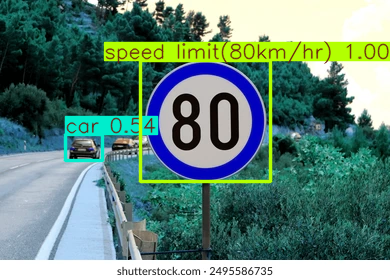

✅ Saved annotated image to runs/detect/custom_predict/annotated.jpg


In [ ]:
!pip install --quiet ultralytics
from ultralytics import YOLO
from PIL import Image as PILImage
from IPython.display import display
import numpy as np
import os

# 1️⃣ Load your trained detection model
model = YOLO("runs/detect/train/weights/best.pt")

# 2️⃣ Define a helper for single‐image inference + display
def predict_and_show(img_path, save_path=None, conf=0.25, iou=0.45):
    """
    Runs YOLOv8 on img_path, displays the annotated image inline,
    and if save_path is given, also saves it there.
    """
    # Run inference (no need for save=True)
    results = model.predict(
        source="/content/traffic-sign-80-speed-limit-260nw-2495586735.webp",
        conf=conf,
        iou=iou,
        verbose=False
    )
    # Get the annotated image as an ndarray (RGB)
    annotated = results[0].plot()

    # Convert to PIL and display inline
    pil_img = PILImage.fromarray(annotated)
    display(pil_img)

    # Optionally save
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        pil_img.save(save_path)
        print(f"✅ Saved annotated image to {save_path}")

# 3️⃣ Run it
test_img = "/content/gettyimages-1214430325.jpg"  # your test image
predict_and_show(
    img_path=test_img,
    save_path="runs/detect/custom_predict/annotated.jpg"
)
